## Analysis of a coarse-grained trajectory

#### In this notebook we will learn how to analyze an amphiphilic coarse grained peptide that self-assembles to form a fiber. 

We will calculate: 
- the density distribution and radial distribution functions of the different residues forming the hydrophobic/hydrophilic portion of the fiber
- the order parameter, defined as the angle between the peptides and the long axis of the fiber
- the eccentricity of the fiber

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.lib import distances 
from MDAnalysis.analysis.lineardensity import LinearDensity

import seaborn as sns

from MDAnalysis.analysis import rdf
import MDAnalysisData as data

In [4]:
CG_fiber = data.datasets.fetch_CG_fiber()

u = mda.Universe(CG_fiber['topology'], CG_fiber['trajectory'])

126chains.psf: 688kB [00:02, 186kB/s]                             
126chains.dcd: 223MB [00:16, 13.3MB/s]                              


In [5]:
poly = u.atoms.select_atoms('not name W CL NA')

In [6]:
len(poly)

1638

In [7]:
w = u.atoms.select_atoms('name W')

In [8]:
POLY = nv.show_mdanalysis(poly)
POLY

/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


A Jupyter Widget

In [9]:
AAA=poly.atoms.select_atoms('resname AAA')
BBB=poly.atoms.select_atoms('resname BBB')
CCC=poly.atoms.select_atoms('resname CCC')
DDD=poly.atoms.select_atoms('resname DDD')

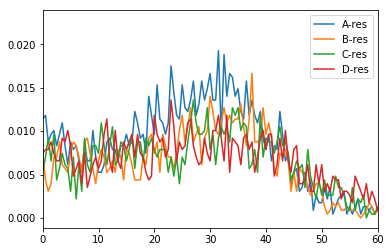

In [10]:
Wdens = LinearDensity(w, binsize=0.5)
Wdens.run(start=0, stop=5)
Adens = LinearDensity(AAA, binsize=0.5)
Adens.run(start=0, stop=5)
Bdens = LinearDensity(BBB, binsize=0.5)
Bdens.run(start=0, stop=5)
Cdens = LinearDensity(CCC, binsize=0.5)
Cdens.run(start=0, stop=5)
Ddens = LinearDensity(DDD, binsize=0.5)
Ddens.run(start=0, stop=5)

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x = np.arange(0,AAA.dimensions[1], 0.5)

fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

In [ ]:
Wdens = LinearDensity(w, binsize=0.5)
Adens = LinearDensity(AAA, binsize=0.5)
Bdens = LinearDensity(BBB, binsize=0.5)
Cdens = LinearDensity(CCC, binsize=0.5)
Ddens = LinearDensity(DDD, binsize=0.5)

Wdens.run(start=5, stop=10)
Adens.run(start=5, stop=10)
Bdens.run(start=5, stop=10)
Cdens.run(start=5, stop=10)
Ddens.run(start=5, stop=10)

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])
x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

In [ ]:
Wdens = LinearDensity(w, binsize=0.5)
Adens = LinearDensity(AAA, binsize=0.5)
Bdens = LinearDensity(BBB, binsize=0.5)
Cdens = LinearDensity(CCC, binsize=0.5)
Ddens = LinearDensity(DDD, binsize=0.5)

Wdens.run(start=10, stop=50)
Adens.run(start=10, stop=50)
Bdens.run(start=10, stop=50)
Cdens.run(start=10, stop=50)
Ddens.run(start=10, stop=50)

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

In [ ]:
Wdens = LinearDensity(w, binsize=0.5)
Adens = LinearDensity(AAA, binsize=0.5)
Bdens = LinearDensity(BBB, binsize=0.5)
Cdens = LinearDensity(CCC, binsize=0.5)
Ddens = LinearDensity(DDD, binsize=0.5)

Wdens.run(start=50, stop=100)
Adens.run(start=50, stop=100)
Bdens.run(start=50, stop=100)
Cdens.run(start=50, stop=100)
Ddens.run(start=50, stop=100)

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

In [ ]:
Wdens = LinearDensity(w, binsize=0.5)
Adens = LinearDensity(AAA, binsize=0.5)
Bdens = LinearDensity(BBB, binsize=0.5)
Cdens = LinearDensity(CCC, binsize=0.5)
Ddens = LinearDensity(DDD, binsize=0.5)

Wdens.run(start=100, stop=1000)
Adens.run(start=100, stop=1000)
Bdens.run(start=100, stop=1000)
Cdens.run(start=100, stop=1000)
Ddens.run(start=100, stop=1000)

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

In [ ]:
Wdens1 = LinearDensity(w, binsize=0.5)
Wdens1.run(start=0, stop=5)
Wdens2 = LinearDensity(w, binsize=0.5)
Wdens2.run(start=5, stop=10)
Wdens3 = LinearDensity(w, binsize=0.5)
Wdens3.run(start=10, stop=50)
Wdens4 = LinearDensity(w, binsize=0.5)
Wdens4.run(start=50, stop=100)
Wdens5 = LinearDensity(w, binsize=0.5)
Wdens5.run(start=100, stop=1000)
Wdens6 = LinearDensity(w, binsize=0.5)
Wdens6.run(start=1000, stop=2000)

Wdens1_xy = 0.5*(Wdens1.results['x']['pos']+ Wdens1.results['y']['pos'])
Wdens2_xy = 0.5*(Wdens2.results['x']['pos']+ Wdens2.results['y']['pos'])
Wdens3_xy = 0.5*(Wdens3.results['x']['pos']+ Wdens3.results['y']['pos'])
Wdens4_xy = 0.5*(Wdens4.results['x']['pos']+ Wdens4.results['y']['pos'])
Wdens5_xy = 0.5*(Wdens5.results['x']['pos']+ Wdens5.results['y']['pos'])
Wdens6_xy = 0.5*(Wdens6.results['x']['pos']+ Wdens6.results['y']['pos'])

fig, ax = plt.subplots()
ax.plot(x, Wdens1_xy, label='water frame 5')
ax.plot(x, Wdens2_xy, label='water frame 10')
ax.plot(x, Wdens3_xy, label='water frame 50')
ax.plot(x, Wdens4_xy, label='water frame 100')
ax.plot(x, Wdens5_xy, label='water frame 1000')
ax.plot(x, Wdens6_xy, label='water frame 2000')

plt.legend()
plt.xlim([0,60])
plt.show()


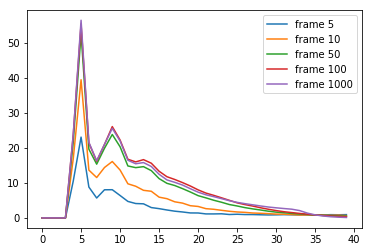

In [11]:
T4=AAA.atoms.select_atoms("name T4")
A_rdf1=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf2=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf3=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf4=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf5=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))

A_rdf1.run(start=0, stop=5)
A_rdf2.run(start=5, stop=10)
A_rdf3.run(start=10, stop=50)
A_rdf4.run(start=50, stop=100)
A_rdf5.run(start=100, stop=1000)

fig, ax = plt.subplots()
ax.plot(A_rdf1.rdf, label='frame 5')
ax.plot(A_rdf2.rdf, label='frame 10')
ax.plot(A_rdf3.rdf, label='frame 50')
ax.plot(A_rdf4.rdf, label='frame 100')
ax.plot(A_rdf5.rdf, label='frame 1000')
plt.legend()
plt.show()

/anaconda/lib/python3.6/site-packages/MDAnalysis/analysis/base.py:115: DeprecationWarning: Setting the following kwargs should be done in the run() method: start, stop
  DeprecationWarning)


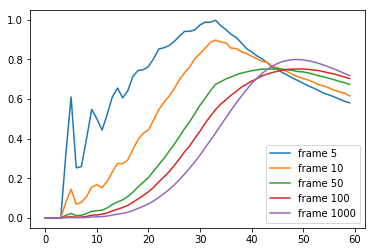

In [12]:
Aw_rdf1=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=0, stop=5)
Aw_rdf2=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=5, stop=10)
Aw_rdf3=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=10, stop=50)
Aw_rdf4=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=50, stop=100)
Aw_rdf5=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=100, stop=1000)

Aw_rdf1.run()
Aw_rdf2.run()
Aw_rdf3.run()
Aw_rdf4.run()
Aw_rdf5.run()
fig, ax = plt.subplots()
ax.plot(Aw_rdf1.rdf, label='frame 5')
ax.plot(Aw_rdf2.rdf, label='frame 10')
ax.plot(Aw_rdf3.rdf, label='frame 50')
ax.plot(Aw_rdf4.rdf, label='frame 100')
ax.plot(Aw_rdf5.rdf, label='frame 1000')
plt.legend()
plt.show()

In [16]:
def order_parameter(u,start,stop):
    vec = np.array([0, 0, 1])
    poly= u.atoms.select_atoms('not name W CL NA')
    angle = []
    for ts in u.trajectory[start:stop]:
        for f in poly.atoms.fragments:
            pa = f.principal_axes()[-1]
            costheta = np.dot(pa, vec)
            angle.append(np.rad2deg(np.arccos(costheta)))
    return angle 

In [22]:
op1=order_parameter(u,0,50)

In [23]:
op2=order_parameter(u,50,100)

In [24]:
op3=order_parameter(u,100,150)

In [25]:
op4=order_parameter(u,150,200)

In [58]:
op5=order_parameter(u,200,1000)

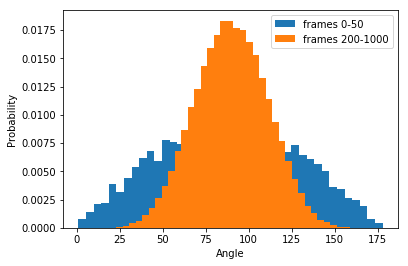

In [59]:
plt.hist(op1, density=True, bins=40, label='frames 0-50')
plt.hist(op5, density=True, bins=40, label='frames 200-1000')
plt.ylabel('Probability')
plt.xlabel('Angle')
plt.legend()
plt.show()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


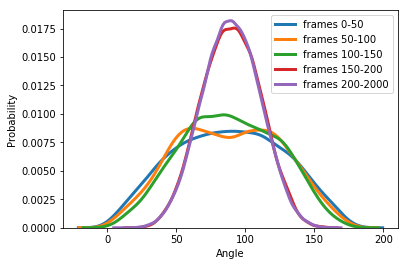

In [68]:
sns.kdeplot(op1, lw=3, label='frames 0-50')
sns.kdeplot(op2, lw=3, label='frames 50-100')
sns.kdeplot(op3, lw=3, label='frames 100-150')
sns.kdeplot(op4, lw=3, label='frames 150-200')
sns.kdeplot(op5, lw=3, label='frames 200-2000')
plt.ylabel('Probability')
plt.xlabel('Angle')
plt.show()

In [62]:
ecc = []
for ts in u.trajectory:
# Calculate eccentricity using moment of inertia
    mom_i = poly.moment_of_inertia()
    w, v = LA.eig(mom_i)
    idx = w.argsort()[::-1]   
    w = w[idx]
    w
    #w[0] is along the long axis of fiber (z-axis), w[1] and w[2] are along x and y
    eccentricity = np.sqrt(1-w[1]/w[0])
    ecc.append(eccentricity)

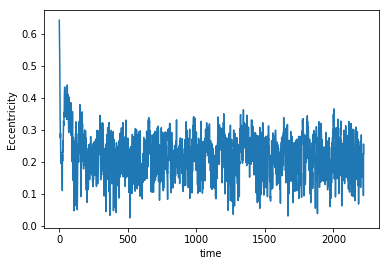

In [69]:
fig, ax = plt.subplots()
ax.plot(ecc)
plt.ylabel('Eccentricity')
plt.xlabel('time')
plt.show()